<a href="https://colab.research.google.com/github/dirudiez/TFM_DiegoRudiez/blob/main/ClasificadorBinario_inception_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=550a08945499aa9ff119547dc4aefbbeec0e5dbf&device=unknown&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f77616c6b776974686661737461692f77616c6b776974686661737461692e6769746875622e696f2f353530613038393435343939616139666631313935343764633461656662626565633065356462662f6e62732f30325f766973696f6e2e65787465726e616c2e74696d6d2e6970796e62&logged_in=false&nwo=walkwithfastai%2Fwalkwithfastai.github.io&path=nbs%2F02_vision.external.timm.ipynb&platform=android&repository_id=295613905&repository_type=Repository&version=98

En este cuaderno probaremos la arquitectura efficientnet_b3 para ver si obtenemos unos mejores resultados.

## Efficientnet_b3

In [1]:
!pip install fastai -Uq
!pip install timm

#Reiniciamos el entorno de ejecución automáticamente
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

     |████████████████████████████████| 197 kB 6.0 MB/s 
     |████████████████████████████████| 60 kB 2.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 431 kB 7.4 MB/s 


{'restart': True, 'status': 'ok'}

In [1]:
from fastai.vision.all import *

In [2]:
!pip install wwf
!pip install nbdev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.7 MB/s 
     |████████████████████████████████| 53 kB 1.4 MB/s 
     |████████████████████████████████| 561 kB 15.1 MB/s 
     |████████████████████████████████| 133 kB 56.3 MB/s 
     |████████████████████████████████| 132 kB 59.5 MB/s 
     |████████████████████████████████| 106 kB 32.1 MB/s 
     |████████████████████████████████| 428 kB 50.8 MB/s 
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.1.1
    Uninstalling traitlets-5.1.1:
      Successfully uninstalled traitlets-5.1.1
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-

In [3]:
from wwf.utils import *
from wwf.vision.timm import *

## Dataset

En este caso estamos usando el dataset que ha sido preprocesados mediante el método de recorte

In [4]:
!wget https://www.dropbox.com/s/o1eaoae59qgdo4i/Training_Set_Pre.zip?dl=0 --no-verbose -O train.zip
!wget https://www.dropbox.com/s/5od5cac9xhxlcwu/Test_Set_Pre.zip?dl=0 --no-verbose -O test.zip
!wget https://www.dropbox.com/s/gjz445xm4oddfus/Evaluation_Set_Pre.zip?dl=0 --no-verbose -O val.zip

2022-06-17 15:20:07 URL:https://ucc8c16443cd88ca7fc677b1366e.dl.dropboxusercontent.com/cd/0/inline2/BnZyQlKz6sEJsK3XxgpGuvvWmoe2Lt7KI3NP50QRJApz0Y0Iril24rbIEdiXNWD1J3Djh2AxRD-cOj1o-ADpcNcifne4L1e3uUXKsMXGFSpbepcluqAZ2c3yq1zFCqsXXOHTv_SQ6NsCGy67Cz-H9k-0anRCzdrdBb9ypJ0CfCrTKyJFMG0-vVZV4x1fR2htljbaGSq15RbZSsSndpAtMlAN840HvckbAlLwQK97fgChHfi8B-wpzBV_HAIrrmJQQKe_EnujvWJuOtOQv90BpyG_-vQpZmoZZvUnXZAUhg6pd-Fc3ZGM3Cf_jwdM1271JQv9AiEycMQdzY_6UEEzggFSAIS_lNpr5ZWKGiECEu2r47uh9GDBY1LQARxmBN55twLIpoF6zkUrW2XUT6BKv74mXOdZmtJY2dDJX7T54XF2BQ/file [138777773/138777773] -> "train.zip" [1]
2022-06-17 15:20:09 URL:https://uca2e24739d1ceb41108273a24a2.dl.dropboxusercontent.com/cd/0/inline2/Bna3Vqg-6-WkkOvnWnaJN9R_wF8MdheTpIBgKbtQdF1-QcM-whrYdgYxeG_81cK9filuHXk4bIGAsnGckZsX8lLAGekH9Lz1Vr-9iGJOgP-3qjI-EL67KN0jogzsHLPiXYZa3HSUK_IbLbN52kJrhDTDXk5mDgJgJBYdKuRb-sW8dxDWzC52bUADuvaoN9FOjKJ8zQSuRo1-BV8hktwJqGl297AQbktblD3F8cyw8WuouThU-ENesw3O__yBhy1Ek_vPabEYY9bY9PzySPYJUcA6srLHQfKGeOsavwdJrx_VBa8tto09sp6lM5LJ_fqJUHU

In [5]:
# !rm -rvf Training_Set_Pre
!unzip -qq train.zip #-qq no verbose
!unzip -qq test.zip
!unzip -qq val.zip

In [6]:
#Método para crear estructura de directorios
def crearEstructura(nombreDataset, clases):
  !mkdir "$nombreDataset"
  !mkdir "$nombreDataset"/test
  !mkdir "$nombreDataset"/train
  !mkdir "$nombreDataset"/val
  for x in clases:
    !mkdir "$nombreDataset"/train/"$x"
    !mkdir "$nombreDataset"/test/"$x"
    !mkdir "$nombreDataset"/val/"$x"

In [7]:
crearEstructura('dataset', ['normal', 'enfermedad'])

In [8]:
trainPath = Path('Training_Set_Pre/')
testPath  = Path('Test_Set_Pre/')
valPath  =  Path('Evaluation_Set_Pre/')

In [9]:
df_train = pd.read_csv(str(trainPath) + '/train.csv')
df_test = pd.read_csv(str(testPath) + '/test.csv')
df_val = pd.read_csv(str(valPath) + '/val.csv')

#### Mover imágenes:

In [10]:
import shutil

def moverImg(df, pathO, pathD):
  for id, enf in zip(df['ID'], df['Disease_Risk']):
    if(int(enf)==0):
        shutil.move(pathO + '/' + str(id) + '.png', pathD + '/normal')
    else:
        shutil.move(pathO + str(id) + '.png', pathD + '/enfermedad')

In [11]:
path = Path('dataset')

In [12]:
moverImg(df_train, str(trainPath) + '/Training/', str(path)  + '/train')
moverImg(df_test, str(testPath) + '/Test/', str(path)  + '/test')
moverImg(df_val, str(valPath) + '/Validation/', str(path)  + '/val')

## Cargando el dataset

In [13]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(train_name='train', valid_name='val'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))

In [14]:
dls = db.dataloaders(path,bs=128)

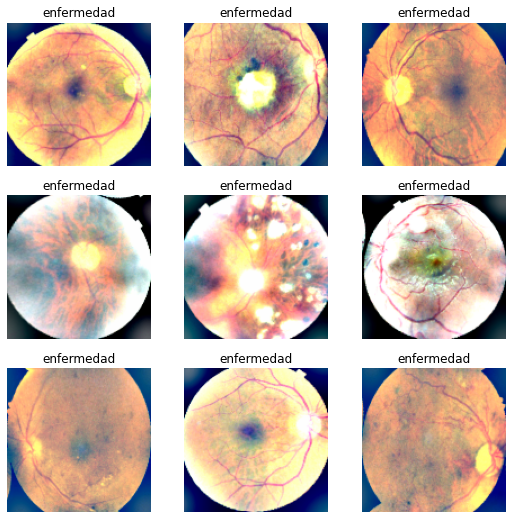

In [15]:
dls.show_batch()

In [16]:
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=20),
    SaveModelCallback()  
]

In [26]:
learn = timm_learner(dls, 'inception_v3', loss_func=FocalLoss(), metrics=[error_rate, accuracy], cbs=callbacks)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


SuggestedLRs(minimum=0.003981071710586548, steep=6.309573450380412e-07, valley=0.0063095735386013985, slide=0.009120108559727669)

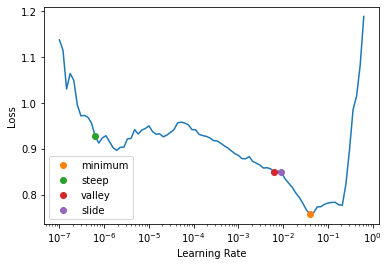

In [27]:
learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

## Entrenamos el modelo

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.053405,0.069888,0.106250,0.893750,00:10


Better model found at epoch 0 with valid_loss value: 0.06988819688558578.


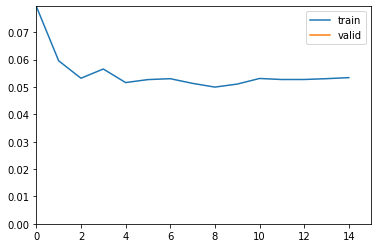

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.055411,0.069817,0.106250,0.893750,00:10
1,0.056094,0.068397,0.107813,0.892187,00:10
2,0.056145,0.067435,0.101562,0.898438,00:10
3,0.056711,0.067882,0.101562,0.898438,00:10
4,0.055441,0.068135,0.106250,0.893750,00:10
5,0.055792,0.069059,0.109375,0.890625,00:10
6,0.055746,0.068588,0.106250,0.893750,00:10
7,0.055961,0.068516,0.109375,0.890625,00:10
8,0.055546,0.067688,0.104687,0.895312,00:10
9,0.054795,0.066907,0.106250,0.893750,00:10


Better model found at epoch 0 with valid_loss value: 0.0698167234659195.


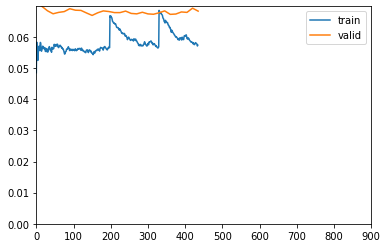

Better model found at epoch 1 with valid_loss value: 0.06839658319950104.
Better model found at epoch 2 with valid_loss value: 0.06743470579385757.
Better model found at epoch 9 with valid_loss value: 0.06690733879804611.
No improvement since epoch 9: early stopping
CPU times: user 2min 14s, sys: 28.7 s, total: 2min 43s
Wall time: 5min 39s


In [52]:
%%time
learn.fine_tune(60,base_lr=1e-7)

## Evaluando el Modelo

In [53]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))
dlsTest = dbTest.dataloaders(path,bs=128)

In [54]:
learn.dls = dlsTest

Obtenemos una accuracy de 0.89.

In [55]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.10625000298023224.


(#3) [0.06690733879804611,0.10625000298023224,0.893750011920929]

Exportamos el modelo:

In [56]:
learn.to_fp32()
learn.export('modeloBinario_inception_v3.pkl')

## Interpretación del modelo

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


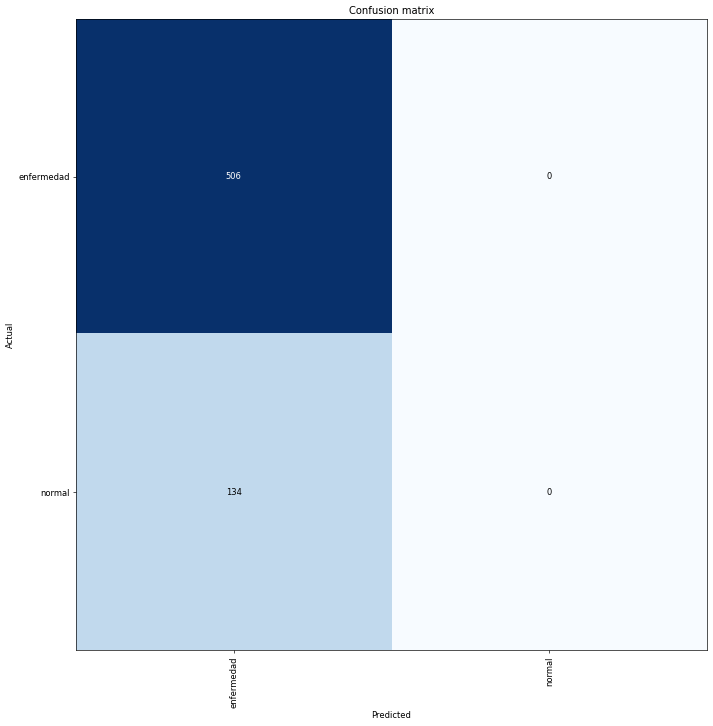

In [58]:
learn_inf = load_learner('modeloBinario_inception_v3.pkl')
learnInterp = cnn_learner(dls,resnet18).to_fp16()
learnInterp.model = learn_inf.model
interp = ClassificationInterpretation.from_learner(learnInterp)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)